In [12]:
pip install onnxruntime-gpu


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/279.7 MB ? eta -:--:--
   --- ----------------------------------- 23.3/279.7 MB 113.6 MB/s eta 0:00:03
   ------ -------------------------------- 47.2/279.7 MB 111.2 MB/s eta 0:00:03
   --------- ----------------------------- 66.1/279.7 MB 107.9 MB/s eta 0:00:02
   ----------- --------------------------- 84.7/279.7 MB 101.9 MB/s eta 0:00:02
   -------------- ----------------------- 106.4/279.7 MB 102.9 MB/s eta 0:00:02
   ----------------- -------------------- 129.2/279.7 MB 104.4 MB/s eta 0:00:02
   -------------------- ----------------- 149.9/279.7 MB 104.1 MB/s eta 0:00:02
   ----------------------- -------------- 173.0/279.7 MB 104.3 MB/s eta 0:00:02
   -------------------------- ----------- 195.0/279.7 MB 104.7 MB/s eta 0:00:01
   ---------------------------- --------- 206.6/279.7 MB 100.8 MB/s eta 0:00:01
   ------------------------------- ------- 225.2/27

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [13]:
import os
import random
from pathlib import Path
from io import BytesIO
from urllib.request import urlopen
from tqdm import tqdm
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt


c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Folder: asl_alphabet_test
Image Dimensions: 200 x 200
Image Type: RGB


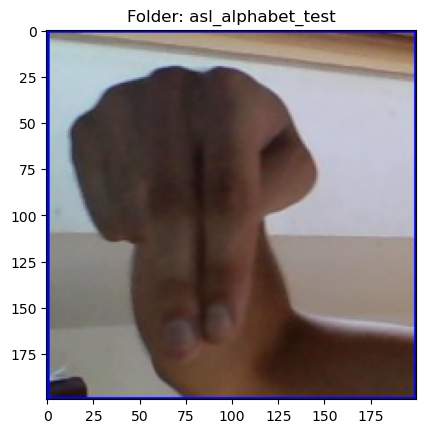

Folder: A
Image Dimensions: 200 x 200
Image Type: RGB


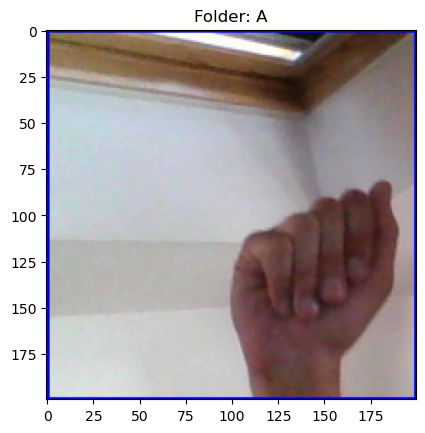

Folder: B
Image Dimensions: 200 x 200
Image Type: RGB


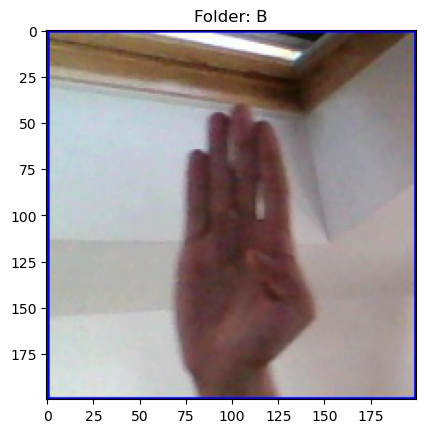

Folder: C
Image Dimensions: 200 x 200
Image Type: RGB


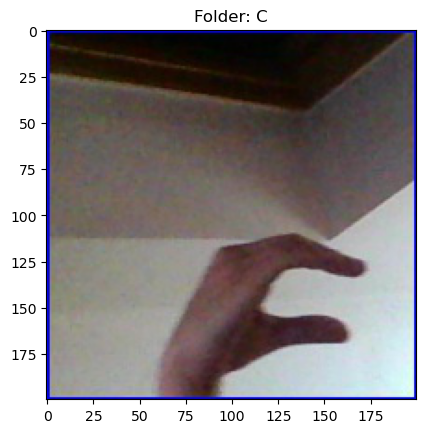

Folder: D
Image Dimensions: 200 x 200
Image Type: RGB


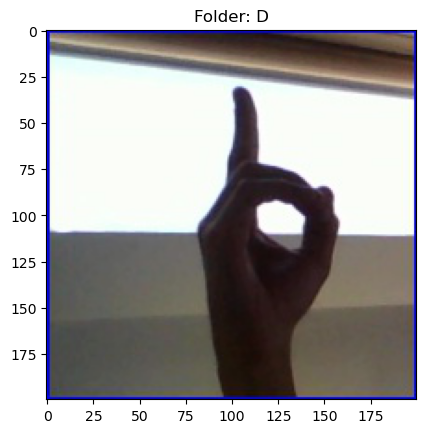

Folder: E
Image Dimensions: 200 x 200
Image Type: RGB


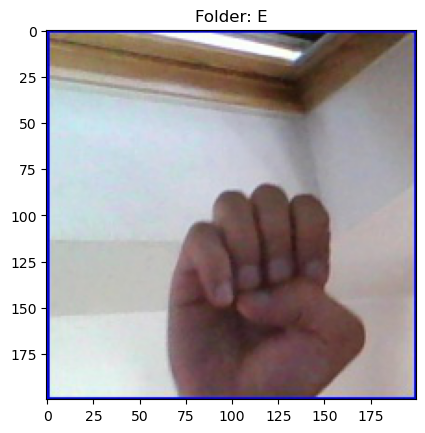

Folder: F
Image Dimensions: 200 x 200
Image Type: RGB


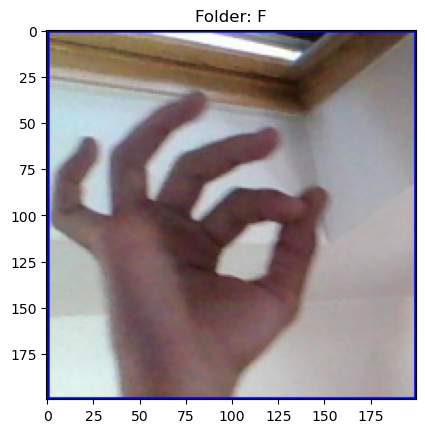

Folder: G
Image Dimensions: 200 x 200
Image Type: RGB


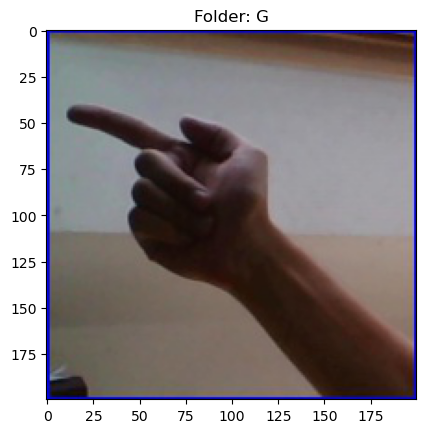

In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

# Function to load and display a few samples from a folder
def display_samples(folder_path, num_samples=1):
    for root, dirs, files in os.walk(folder_path):
        if not dirs:  # If the current folder has no subdirectories (innermost folder)
            current_folder_path = root
            image_files = [f for f in files if f.endswith(('.jpg', '.jpeg', '.png'))]

            # Choose random images from the folder
            sample_images = random.sample(image_files, min(num_samples, len(image_files)))

            # Display sample images
            for image_name in sample_images:
                image_path = os.path.join(current_folder_path, image_name)
                image = Image.open(image_path)

                # Get image dimensions
                width, height = image.size

                # Check if the image is RGB or grayscale
                image_type = "RGB" if image.mode == "RGB" else "Grayscale"

                # Display image information
                print(f"Folder: {os.path.basename(current_folder_path)}")
                print(f"Image Dimensions: {width} x {height}")
                print(f"Image Type: {image_type}")

                # Display the image
                plt.imshow(image)
                plt.title(f"Folder: {os.path.basename(current_folder_path)}")
                plt.show()

# Specify the path to your dataset
dataset_folder_path = 'D:\AmericanSignLanguage'

# Display a few samples from the innermost folders
display_samples(dataset_folder_path, num_samples=1)


In [16]:
import os
from PIL import Image
from io import BytesIO
from tqdm import tqdm
from rembg import remove

# Function to remove background using rembg
def remove_background_with_rembg(image_path):
    with open(image_path, "rb") as input_file:
        input_data = input_file.read()

    output_data = remove(input_data)

    # Convert output_data to a PIL Image
    output_image = Image.open(BytesIO(output_data))

    # Convert to RGB mode if the image has an alpha channel
    if output_image.mode == 'RGBA':
        output_image = output_image.convert('RGB')

    return output_image


# Directories
input_directory = r'D:\AmericanSignLanguage\Raw'  # Input folder
output_directory = r'D:\AmericanSignLanguage\No_bg'     # Output folder

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Process images
for root, dirs, files in os.walk(input_directory):
    for item in tqdm(files, desc=f"Processing {root}"):
        item_path = os.path.join(root, item)

        # Check if the item has a common image extension
        if item.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                # Remove background
                processed_image = remove_background_with_rembg(item_path)

                # Create the corresponding output subdirectory
                relative_path = os.path.relpath(item_path, input_directory)
                output_subdirectory = os.path.join(output_directory, os.path.dirname(relative_path))
                os.makedirs(output_subdirectory, exist_ok=True)

                # Save the processed image
                output_filename = os.path.join(output_subdirectory, f"processed_{item}")
                if not os.path.exists(output_filename):  # Skip if already processed
                    processed_image.save(output_filename)
                else:
                    print(f"Skipping existing file: {output_filename}")

            except Exception as e:
                print(f"Error processing {item_path}: {e}")


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 23-24: malformed \N character escape (4133955718.py, line 21)